# Global Mean Response
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

## import and parameters

In [1]:
%matplotlib notebook
!date

import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth
import geoxarray

Thu Jul 12 16:45:19 EDT 2018
[Start] matplotlib settings: ####################
Python: 3.6.5
matplotlib: 2.2.2 backend nbAgg
interactive = True
figure.max_open_warning = 50
hatch.linewidth = 0.5
hatch.color = gray
legend.frameon = False
savefig.bbox = tight
savefig.format = pdf
[End] matplotlib settings. ####################


In [5]:
# parameters
data_names = ['swup_toa_clr', 'netrad_toa', 't_surf', 'sfc_hflux_coupler']
figname = f'figs/fig_globalMean.pdf'
prcp_scale = 3600 * 24

ds = xr.open_dataset('/tigress/wenchang/MODEL_OUT/PIctl_CMIP6volc/POSTP/00010101.ocean_grid.nc')
ocean_tgrid_area = ds.area_t + ds.ht*0 # ds.ht*0 is the ocean mask

# global mean for ocean data
def area_mean(da, yt_ocean=None):
    '''area-weighted average for ocean data'''
    if yt_ocean is None:
        da_ = da
        area = ocean_tgrid_area
    else:
        da_ = da.sel(yt_ocean=yt_ocean)
        area = ocean_tgrid_area.sel(yt_ocean=yt_ocean)
    return (da * area).sum(['xt_ocean', 'yt_ocean'])/area.sum()

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


## Agung data

In [7]:
# Agung data
tsas_agung = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_agung import open_data as get_volcano
    volcano_name = 'Agung'
    year_volcano = 1963
    ens = range(1,31)
    nbname = 'volcano_impact_on_climate_agung.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        
    tsas_agung[data_name] = dict()
    if data_name in ('sfc_hflux_coupler',): # area mean for ocean grids
        tsas_agung[data_name]['Global'] = area_mean(daa)
        tsas_agung[data_name]['NH'] = area_mean(daa, yt_ocean=slice(0,90))
        tsas_agung[data_name]['SH'] = area_mean(daa, yt_ocean=slice(-90,0))
    else:
        tsas_agung[data_name]['Global'] = daa.geo.fldmean()
        tsas_agung[data_name]['NH'] = daa.sel(lat=slice(0,90)).geo.fldmean()
        tsas_agung[data_name]['SH'] = daa.sel(lat=slice(-90,0)).geo.fldmean()

Data loaded from cache/volcano_impact_on_climate_agung.ipynb.swup_toa_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.swup_toa_clr.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.sfc_hflux_coupler.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.sfc_hflux_coupler.nc


## StMaria data

In [8]:
# St Maria data
tsas_stmaria = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_stmaria import open_data as get_volcano
    volcano_name = 'StMaria'
    year_volcano = 1902
    ens = range(1,30+1)
    nbname = 'volcano_impact_on_climate_stmaria.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
    
    tsas_stmaria[data_name] = dict()
    if data_name in ('sfc_hflux_coupler',): # area mean for ocean grids
        tsas_stmaria[data_name]['Global'] = area_mean(daa)
        tsas_stmaria[data_name]['NH'] = area_mean(daa, yt_ocean=slice(0,90))
        tsas_stmaria[data_name]['SH'] = area_mean(daa, yt_ocean=slice(-90,0))
    else:
        tsas_stmaria[data_name]['Global'] = daa.geo.fldmean()
        tsas_stmaria[data_name]['NH'] = daa.sel(lat=slice(0,90)).geo.fldmean()
        tsas_stmaria[data_name]['SH'] = daa.sel(lat=slice(-90,0)).geo.fldmean()

Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.swup_toa_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.swup_toa_clr.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.sfc_hflux_coupler.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.sfc_hflux_coupler.nc


## Pinatubo data

In [9]:
# Pinatubo data
tsas_pinatubo = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_pinatubo import open_data as get_volcano
    volcano_name = 'Pinatubo'
    year_volcano = 1991
    ens = range(1,30+1)
    nbname = 'volcano_impact_on_climate_pinatubo.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
    
    tsas_pinatubo[data_name] = dict()
    if data_name in ('sfc_hflux_coupler',): # area mean for ocean grids
        tsas_pinatubo[data_name]['Global'] = area_mean(daa)
        tsas_pinatubo[data_name]['NH'] = area_mean(daa, yt_ocean=slice(0,90))
        tsas_pinatubo[data_name]['SH'] = area_mean(daa, yt_ocean=slice(-90,0))
    else:
        tsas_pinatubo[data_name]['Global'] = daa.geo.fldmean()
        tsas_pinatubo[data_name]['NH'] = daa.sel(lat=slice(0,90)).geo.fldmean()
        tsas_pinatubo[data_name]['SH'] = daa.sel(lat=slice(-90,0)).geo.fldmean()

Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.swup_toa_clr.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.swup_toa_clr.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.sfc_hflux_coupler.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.sfc_hflux_coupler.nc


## Plot

<IPython.core.display.Javascript object>


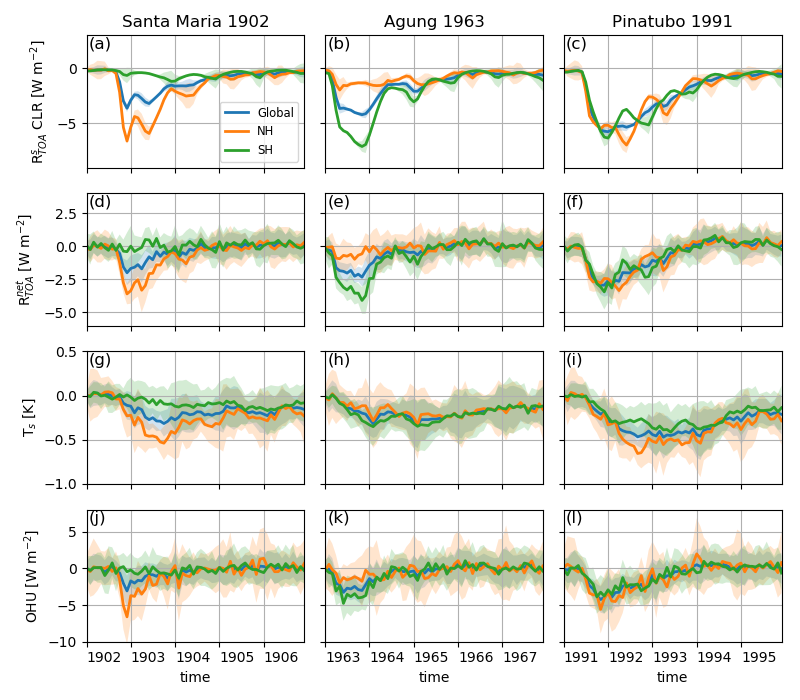

In [77]:
# plot
fill_alpha = 0.2

fig, axes = plt.subplots(4,3,figsize=(8,7), sharey='row', sharex='col')
# ##########
plt.sca(axes[0,0])
data_name = 'swup_toa_clr'

ts = tsas_stmaria[data_name]['Global']*(-1) # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH']*(-1) # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH']*(-1) # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.title('Santa Maria 1902', loc='center')
plt.grid(True)
plt.ylabel('R$^{s}_{TOA}$ CLR [W m$^{-2}$]')
plt.xlabel('')
plt.ylim(-9,3)
plt.text(.01,.99, '(a)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')
plt.legend(loc='lower right', frameon=True, fontsize='small')


# ############
plt.sca(axes[0,1])

ts = tsas_agung[data_name]['Global']*(-1) # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH']*(-1) # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_agung[data_name]['SH']*(-1) # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.title('Agung 1963', loc='center')
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(b)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ############
plt.sca(axes[0,2])

ts = tsas_pinatubo[data_name]['Global']*(-1) # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_pinatubo[data_name]['NH']*(-1) # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_pinatubo[data_name]['SH']*(-1) # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.title('Pinatubo 1991', loc='center')
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(c)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ##########
plt.sca(axes[1,0])
data_name = 'netrad_toa'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.ylabel('R$^{net}_{TOA}$ [W m$^{-2}$]')
plt.ylim(-6,4)
plt.xlabel('')
plt.text(.01,.99, '(d)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ############
plt.sca(axes[1,1])

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

xticksmonth(range(1,13,12), fstr='%Y')
ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(e)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ############
plt.sca(axes[1,2])

ts = tsas_pinatubo[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_pinatubo[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_pinatubo[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(f)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ##########
plt.sca(axes[2,0])
data_name = 't_surf'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.ylabel('T$_s$ [K]')
plt.ylim(-1,.5)
plt.xlabel('')
plt.text(.01,.99, '(g)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ############
plt.sca(axes[2,1])

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

xticksmonth(range(1,13,12), fstr='%Y')
ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(h)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ############
plt.sca(axes[2,2])

ts = tsas_pinatubo[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_pinatubo[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_pinatubo[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(i)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ##########
plt.sca(axes[3,0])
data_name = 'sfc_hflux_coupler'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.ylabel('OHU [W m$^{-2}$]')
plt.ylim(-10,8)
plt.text(.01,.99, '(j)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')
plt.setp(plt.gca().get_xticklabels(), visible=True, rotation=0, 
         horizontalalignment='left')

# ############
plt.sca(axes[3,1])

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

xticksmonth(range(1,13,12), fstr='%Y')
ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.text(.01,.99, '(k)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')
plt.setp(plt.gca().get_xticklabels(), visible=True, rotation=0, 
         horizontalalignment='left')

# ############
plt.sca(axes[3,2])

ts = tsas_pinatubo[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_pinatubo[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_pinatubo[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.text(.01,.99, '(l)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')
plt.setp(plt.gca().get_xticklabels(), visible=True, rotation=0, 
         horizontalalignment='left')

plt.tight_layout(h_pad=1, w_pad=1)
plt.savefig(figname)

### fig

<IPython.core.display.Javascript object>


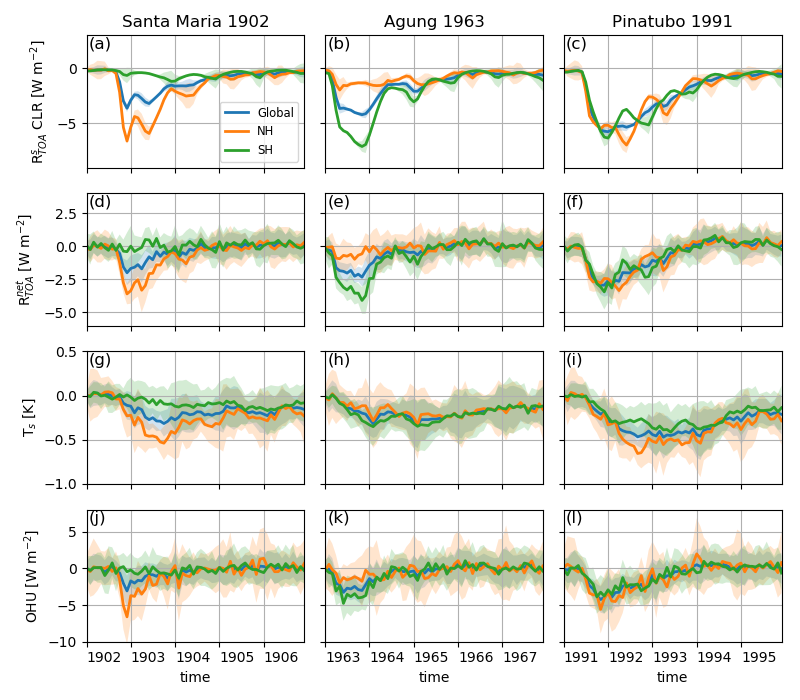

In [77]:
# plot
fill_alpha = 0.2

fig, axes = plt.subplots(4,3,figsize=(8,7), sharey='row', sharex='col')
# ##########
plt.sca(axes[0,0])
data_name = 'swup_toa_clr'

ts = tsas_stmaria[data_name]['Global']*(-1) # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH']*(-1) # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH']*(-1) # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.title('Santa Maria 1902', loc='center')
plt.grid(True)
plt.ylabel('R$^{s}_{TOA}$ CLR [W m$^{-2}$]')
plt.xlabel('')
plt.ylim(-9,3)
plt.text(.01,.99, '(a)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')
plt.legend(loc='lower right', frameon=True, fontsize='small')


# ############
plt.sca(axes[0,1])

ts = tsas_agung[data_name]['Global']*(-1) # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH']*(-1) # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_agung[data_name]['SH']*(-1) # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.title('Agung 1963', loc='center')
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(b)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ############
plt.sca(axes[0,2])

ts = tsas_pinatubo[data_name]['Global']*(-1) # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_pinatubo[data_name]['NH']*(-1) # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_pinatubo[data_name]['SH']*(-1) # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.title('Pinatubo 1991', loc='center')
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(c)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ##########
plt.sca(axes[1,0])
data_name = 'netrad_toa'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.ylabel('R$^{net}_{TOA}$ [W m$^{-2}$]')
plt.ylim(-6,4)
plt.xlabel('')
plt.text(.01,.99, '(d)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ############
plt.sca(axes[1,1])

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

xticksmonth(range(1,13,12), fstr='%Y')
ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(e)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ############
plt.sca(axes[1,2])

ts = tsas_pinatubo[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_pinatubo[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_pinatubo[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(f)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ##########
plt.sca(axes[2,0])
data_name = 't_surf'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.ylabel('T$_s$ [K]')
plt.ylim(-1,.5)
plt.xlabel('')
plt.text(.01,.99, '(g)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ############
plt.sca(axes[2,1])

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

xticksmonth(range(1,13,12), fstr='%Y')
ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(h)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ############
plt.sca(axes[2,2])

ts = tsas_pinatubo[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_pinatubo[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_pinatubo[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.xlabel('')
plt.text(.01,.99, '(i)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')

# ##########
plt.sca(axes[3,0])
data_name = 'sfc_hflux_coupler'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.ylabel('OHU [W m$^{-2}$]')
plt.ylim(-10,8)
plt.text(.01,.99, '(j)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')
plt.setp(plt.gca().get_xticklabels(), visible=True, rotation=0, 
         horizontalalignment='left')

# ############
plt.sca(axes[3,1])

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

xticksmonth(range(1,13,12), fstr='%Y')
ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.text(.01,.99, '(k)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')
plt.setp(plt.gca().get_xticklabels(), visible=True, rotation=0, 
         horizontalalignment='left')

# ############
plt.sca(axes[3,2])

ts = tsas_pinatubo[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_pinatubo[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_pinatubo[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,12), fstr='%Y')
plt.xlim(ts.time.isel(time=[0,-1]).to_index())
plt.grid(True)
plt.text(.01,.99, '(l)', transform=plt.gca().transAxes,
        ha='left', va='top', fontsize='large')
plt.setp(plt.gca().get_xticklabels(), visible=True, rotation=0, 
         horizontalalignment='left')

plt.tight_layout(h_pad=1, w_pad=1)
plt.savefig(figname)